In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud   
from konlpy.tag import Okt
from collections import defaultdict
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

### 국내 해외 비교 그래프 ###

- 파이차트 : 국내외 기술분류 비교

In [4]:
df_k = pd.read_csv("data/KIPRIS 전체.csv")
df_u = pd.read_csv("data/WIPO 전체.csv")

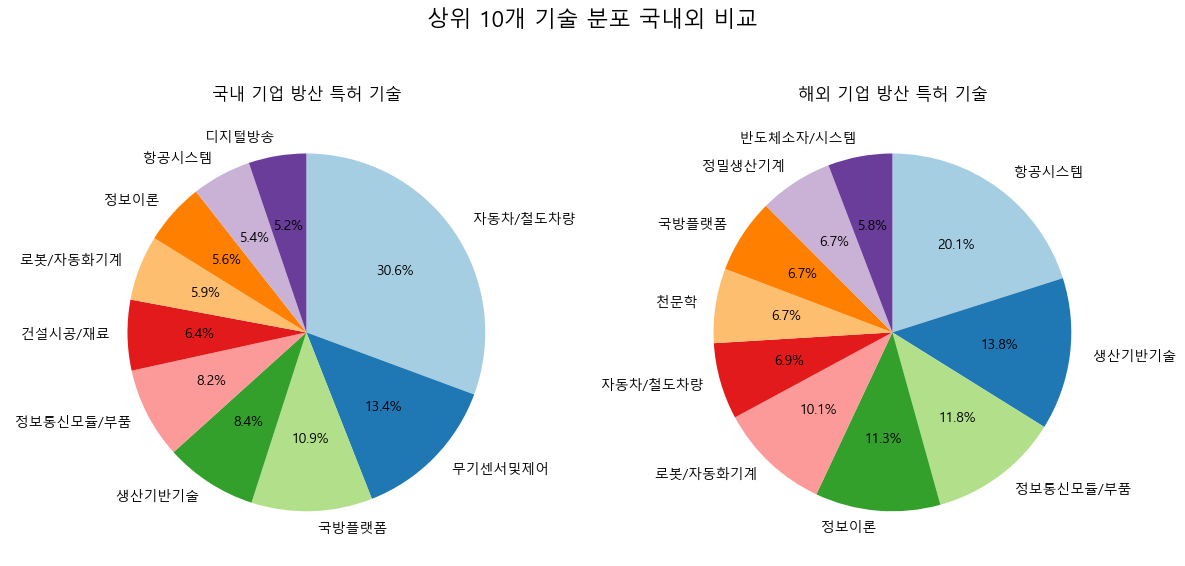

In [175]:
top1 = df_k['기술분류'].value_counts().head(10)
top2 = df_u['기술분류'].value_counts().head(10)
cols = [top1, top2]
title = ['국내 기업 방산 특허 기술', '해외 기업 방산 특허 기술']
# 색상 팔레트 설정 (각 파이차트에 대해 최대 10개 색상)
palette = sns.color_palette("Paired", 10)
# 파이 차트 그리기
fig, axes = plt.subplots(1,2, figsize=(12,8), tight_layout=True)
for i, col in enumerate(cols):
    cnt = col
    axes[i].set_title(title[i])
    axes[i].pie(cnt, labels=cnt.index, startangle=90, autopct='%.1f%%', counterclock=False, colors=palette)
plt.suptitle('상위 10개 기술 분포 국내외 비교', fontsize=16, y=0.88)
# plt.savefig('graph/파이차트_상위 10개 기술 분포 국내외 비교.png') # 표를 이미지로 저장
plt.show()

- 막대 그래프 : 기술 분류별 국내외 방산 특허 비율 비교

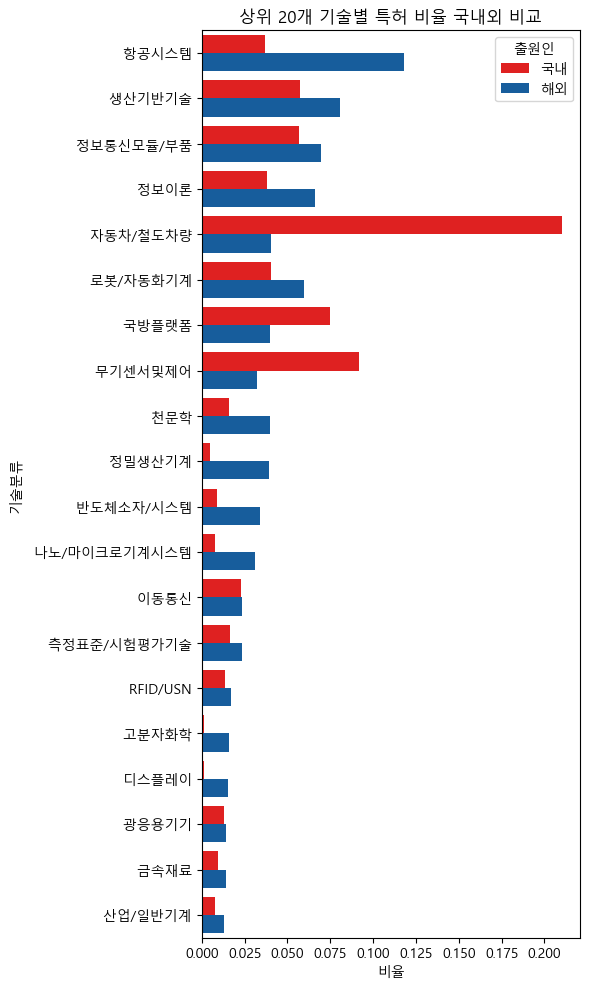

In [174]:
# 데이터 불러오기
df_k = pd.read_csv("data/KIPRIS 전체.csv")
df_u = pd.read_csv("data/WIPO 전체.csv")

# 기업분류라는 새로운 칼럼을 만들어서 국내 해외 기업 컬럼 붙이기
df_k['기업분류'] = '국내'
df_u['기업분류'] = '해외'
df = pd.concat([df_k, df_u], ignore_index=False)

plt.figure(figsize=(6, 10))
# 색상 팔레트 설정
palette = ['#ff0101','#015eb2']

# 20개 기술 뽑음
top = df['기술분류'].value_counts().head(20).index
df_top = df[df['기술분류'].isin(top)]

# 기술분류와 출원인 조합별 개수 계산 후 비율로 변환
count_df = df_top.groupby(['기술분류', '기업분류'], observed=True).size().reset_index(name='count')
count_df['count'] = count_df.apply(lambda row: row['count'] / len(df_k) if row['기업분류'] == '국내' else row['count'] / len(df_u), axis=1)

# 비율을 barplot으로 시각화
sns.barplot(data=count_df, y='기술분류', x='count', hue='기업분류', order=top, palette=palette)

plt.title('상위 20개 기술별 특허 비율 국내외 비교')
plt.xlabel('비율')
plt.ylabel('기술분류')
plt.legend(title='출원인')
plt.tight_layout()
# plt.savefig('graph/막대그래프_상위 20개 기술별 특허 비율 국내외 비교.png')
plt.show()

- 선 그래프 : 출원 월에 따른 특허 출원 수 국내외 비교

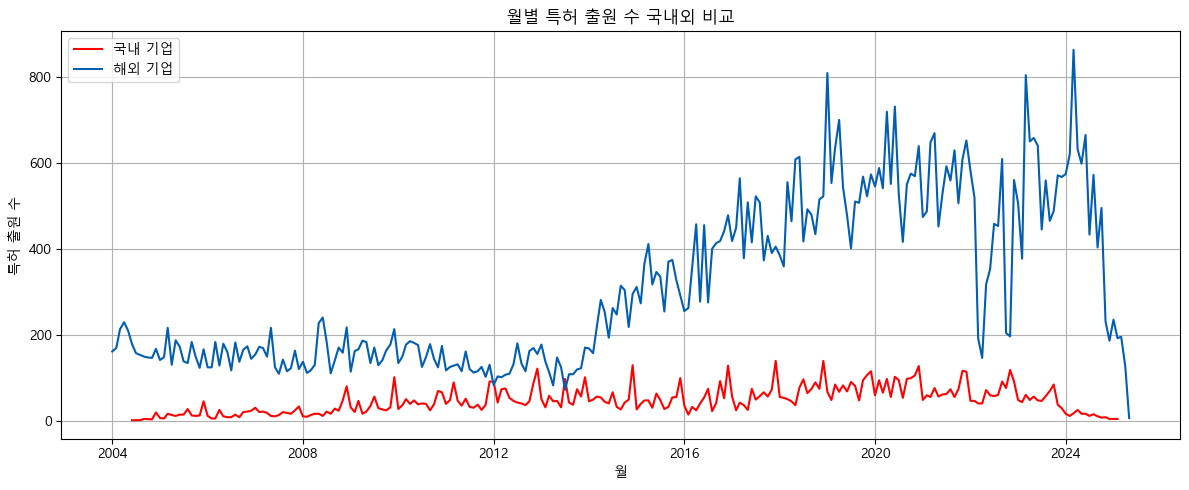

In [169]:
df_k = pd.read_csv("data/KIPRIS 전체.csv")
df_u = pd.read_csv("data/WIPO 전체.csv")
# 날짜를 월 단위로 변환 후 그룹화
def get_monthly_counts(df):
    df['출원일자'] = pd.to_datetime(df['출원일자'])
    df = df[df['출원일자'] >= '2004-01-01']
    return df.groupby(df['출원일자'].dt.to_period('M')).size().sort_index()

# 월별 데이터 추출
domestic_counts = get_monthly_counts(df_k)
foreign_counts = get_monthly_counts(df_u)

# 인덱스를 datetime으로 변환 (그래프용)
domestic_counts.index = domestic_counts.index.to_timestamp()
foreign_counts.index = foreign_counts.index.to_timestamp()

# 색상 팔레트 설정
palette = ['#ff0101','#015eb2']

# 그래프 그리기
plt.figure(figsize=(12, 5))
plt.plot(domestic_counts, label='국내 기업', color=palette[0])
plt.plot(foreign_counts, label='해외 기업', color=palette[1])
plt.title('월별 특허 출원 수 국내외 비교')
plt.xlabel('월')
plt.ylabel('특허 출원 수')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig('graph/선그래프_월별 특허 출원 수 국내외 비교.png')
plt.show()

### 국내 비교 그래프 ###

- 국내 기업 연도별 특허 기술 누적 막대 그래프

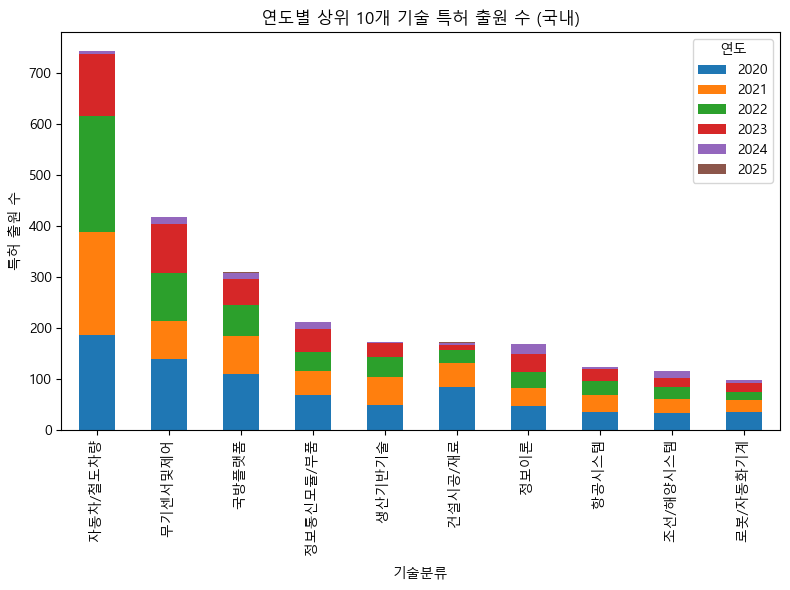

In [173]:
df = pd.read_csv("data/KIPRIS 전체.csv")
df['출원일자'] = pd.to_datetime(df['출원일자'])

# 2019년 이후 데이터 필터링
df = df[df['출원일자'].dt.year > 2019]
df['연도'] = df['출원일자'].dt.year

# 기술분류별, 연도별 개수 집계
df = df.groupby(['기술분류', '연도']).size().unstack(fill_value=0)
top = df.sum(axis=1).sort_values(ascending=False).head(10)

# top 10 기술분류만 필터링
df = df.loc[top.index]

# 누적 막대 그래프 그리기
df.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('연도별 상위 10개 기술 특허 출원 수 (국내)')
plt.xlabel('기술분류')
plt.ylabel('특허 출원 수')
plt.legend(title='연도')
plt.tight_layout()
# plt.savefig('graph/막대그래프_연도별 상위 10개 기술 특허 출원 수 (국내).png')
plt.show()

- 산점도 : 기술/기업/연도 한눈에 보기

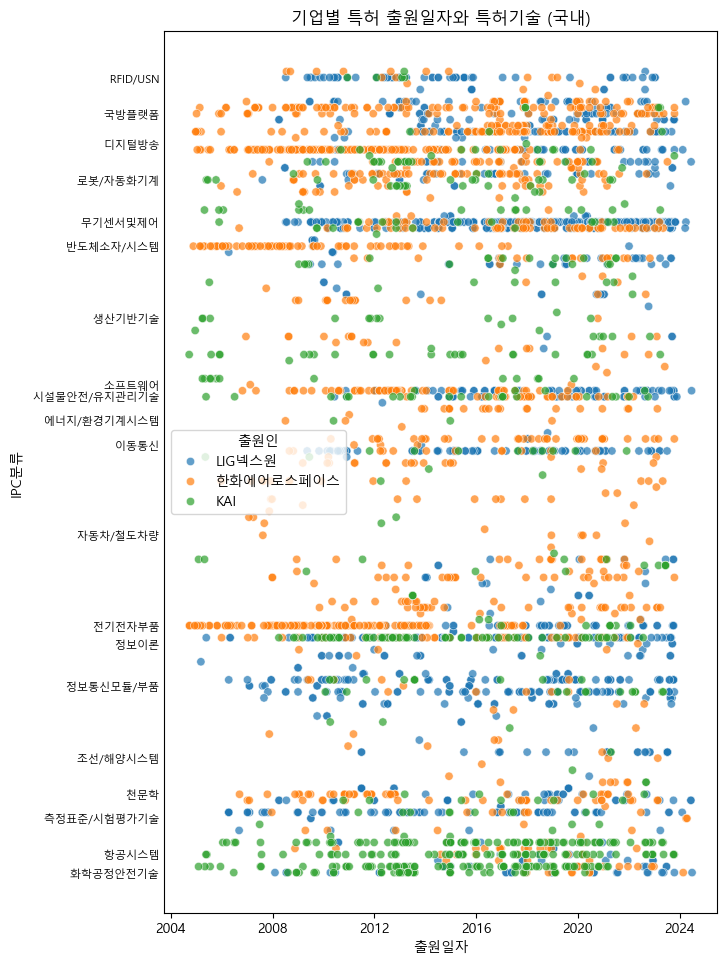

In [2]:
df1 = pd.read_csv("data/LIG넥스원.csv")
df2 = pd.read_csv("data/한화에어로스페이스.csv")
df3 = pd.read_csv("data/KAI.csv")
df = pd.concat([df1, df2, df3], ignore_index=True)

# 데이터 전처리
df = df.dropna(subset=['IPC분류'])
# df['기술분류'] = df['기술분류'].astype('category')
# df['IPC분류'] = df['IPC분류'].astype('category')
df['출원일자'] = pd.to_datetime(df['출원일자'], format='%Y-%m-%d')
df = df[df['출원일자'] >= '2004-01-01']
# 기술분류별 개수 집계
counts = df.groupby('기술분류', observed=False).size().sort_values(ascending=False)
# 상위 20개 기술분류 추출
top = counts.head(20).index
# 필터링
df = df[df['기술분류'].isin(top)]

# 기술분류 이름 기준으로 IPC분류 정렬 순서 설정
ipc_order = df[['IPC분류', '기술분류']].drop_duplicates().sort_values('기술분류')['IPC분류']
df['IPC분류'] = pd.Categorical(df['IPC분류'], categories=ipc_order, ordered=True)

# IPC분류별 대표 기술분류 매핑 (중복 IPC에 대해 첫 기술분류 기준)
ipc_to_tech = df.drop_duplicates(subset=['IPC분류'])[['IPC분류', '기술분류']].set_index('IPC분류')['기술분류'].to_dict()

# 그래프 그리기
plt.figure(figsize=(8, 10))
sns.scatterplot(data=df, x='출원일자', y='IPC분류', hue='출원인', alpha=0.7)

# 기술분류 이름 리스트 생성 (카테고리 순서대로)
original_labels = [ipc_to_tech.get(ipc, ipc) for ipc in df['IPC분류'].cat.categories]

# 중복 기술분류 이름을 그룹으로 묶고 가운데 인덱스만 표시
def keep_center_only(labels):
    new_labels = [''] * len(labels)
    i = 0
    while i < len(labels):
        j = i
        while j < len(labels) and labels[j] == labels[i]:
            j += 1
        mid = (i + j - 1) // 2
        new_labels[mid] = labels[mid]
        i = j
    return new_labels

# 압축된 라벨 만들기
compressed_labels = keep_center_only(original_labels)

# y축 라벨 적용
plt.yticks(
    ticks=range(len(df['IPC분류'].cat.categories)),
    labels=compressed_labels
)

plt.xlabel('출원일자')
plt.ylabel('IPC분류')  # ← 기술분류 아님
plt.title('기업별 특허 출원일자와 특허기술 (국내)')
plt.tight_layout(pad=2)
plt.tick_params(axis='y', length=0, labelsize=8)
# plt.savefig('graph/산점도_기업별 특허 출원일자와 특허기술 (국내).png')
plt.show()

- 선 그래프 : 기술별 누적 출원 수

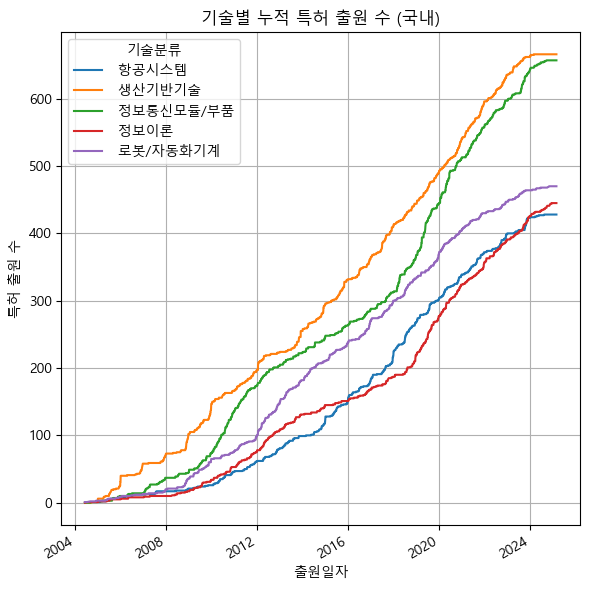

In [136]:
df_k = pd.read_csv("data/KIPRIS 전체.csv")
# 날짜 처리
df_k['출원일자'] = pd.to_datetime(df_k['출원일자'])

# 월별, 분류별 집계 후 누적합
cumulative = (
    df_k.groupby(['출원일자', '기술분류'], observed=True)
      .size()
      .unstack(fill_value=0)
      .sort_index()
      .cumsum()
)

# 사용자 지정 분류
# selected_categories = [' 항공시스템', ' 생산기반기술', ' 정보통신모듈/부품', ' 정보이론', ' 로봇/자동화기계']
selected_categories = df_u['기술분류'].value_counts().head(5).index
selected_cumulative = cumulative[selected_categories]

# 출원일자 컬럼을 Period 형식으로 변환 후 필터링
filtered_cumulative = selected_cumulative[selected_cumulative.index.to_period('M') >= pd.Period('2004-01-01', freq='M')]

# 그래프 그리기
filtered_cumulative.plot(figsize=(6, 6), title='기술별 누적 특허 출원 수 (국내)')
plt.xlabel('출원일자')
plt.ylabel('특허 출원 수')
plt.grid(True)
plt.tight_layout()
plt.legend(title='기술분류')
# plt.savefig('graph/선그래프_기술별 누적 특허 출원 수 (국내).png')
plt.show()

- 선 그래프 : 출원 월에 따른 특허 출원 수

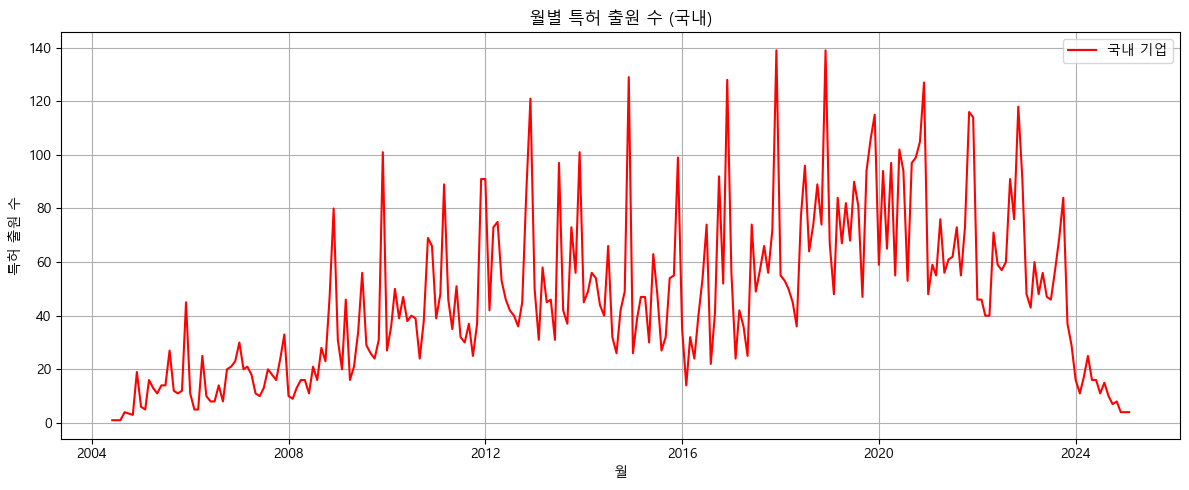

In [166]:
df_k = pd.read_csv("data/KIPRIS 전체.csv")
# 날짜를 월 단위로 변환 후 그룹화
def get_monthly_counts(df):
    df['출원일자'] = pd.to_datetime(df['출원일자'])
    df = df[df['출원일자'] >= '2004-01-01']
    return df.groupby(df['출원일자'].dt.to_period('M')).size().sort_index()

# 월별 데이터 추출
domestic_counts = get_monthly_counts(df_k)

# 인덱스를 datetime으로 변환 (그래프용)
domestic_counts.index = domestic_counts.index.to_timestamp()

# 색상 팔레트 설정
palette = ['#ff0101','#015eb2']

# 그래프 그리기
plt.figure(figsize=(12, 5))
plt.plot(domestic_counts, label='국내 기업', color=palette[0])
plt.title('월별 특허 출원 수 (국내)')
plt.xlabel('월')
plt.ylabel('특허 출원 수')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig('graph/선그래프_월별 특허 출원 수 (국내).png')
plt.show()

### 해외 비교 그래프 ###

- 국내 기업 연도별 특허 기술 누적 막대 그래프

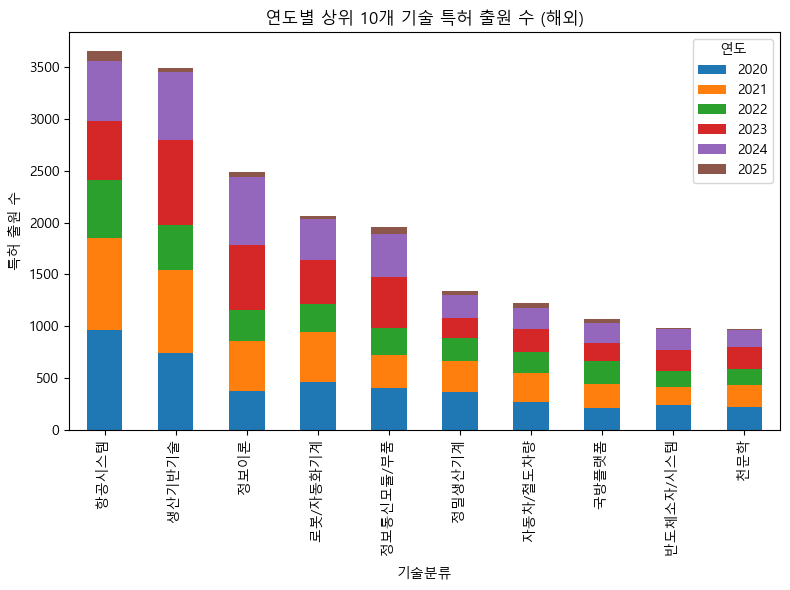

In [182]:
df = pd.read_csv("data/WIPO 전체.csv")
df['출원일자'] = pd.to_datetime(df['출원일자'])

# 2019년 이후 데이터 필터링
df = df[df['출원일자'].dt.year > 2019]
df['연도'] = df['출원일자'].dt.year

# 기술분류별, 연도별 개수 집계
df = df.groupby(['기술분류', '연도']).size().unstack(fill_value=0)
top = df.sum(axis=1).sort_values(ascending=False).head(10)

# top 10 기술분류만 필터링
df = df.loc[top.index]

# 누적 막대 그래프 그리기
df.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('연도별 상위 10개 기술 특허 출원 수 (해외)')
plt.xlabel('기술분류')
plt.ylabel('특허 출원 수')
plt.legend(title='연도')
plt.tight_layout()
plt.savefig('graph/연도별 상위 10개 기술 특허 출원 수 (해외).png')
plt.show()

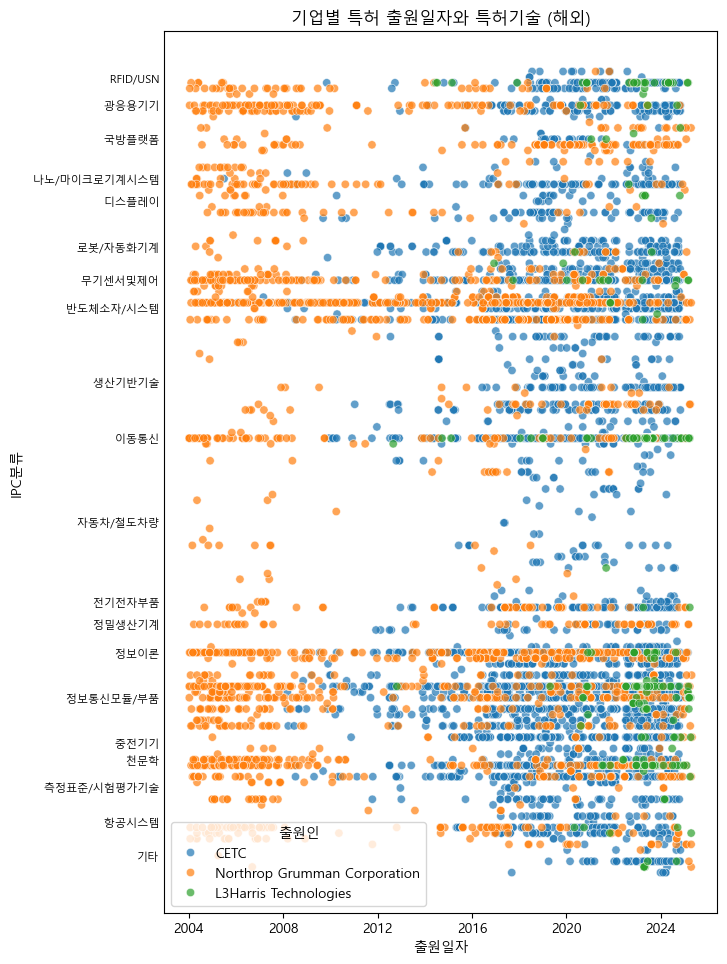

In [3]:
df1 = pd.read_csv("data/CETC.csv")
df2 = pd.read_csv("data/Northrop Grumman Corporation.csv")
df3 = pd.read_csv("data/L3Harris Technologies.csv")
df= pd.concat([df1, df2, df3], ignore_index=True)

# 데이터 전처리
df = df.dropna(subset=['IPC분류'])
# df['기술분류'] = df['기술분류'].astype('category')
# df['IPC분류'] = df['IPC분류'].astype('category')
df['출원일자'] = pd.to_datetime(df['출원일자'], format='%Y-%m-%d')
df = df[df['출원일자'] >= '2004-01-01']
# 기술분류별 개수 집계
counts = df.groupby('기술분류', observed=False).size().sort_values(ascending=False)
# 상위 20개 기술분류 추출
top = counts.head(20).index
# 필터링
df = df[df['기술분류'].isin(top)]

# 기술분류 이름 기준으로 IPC분류 정렬 순서 설정
ipc_order = df[['IPC분류', '기술분류']].drop_duplicates().sort_values('기술분류')['IPC분류']
df['IPC분류'] = pd.Categorical(df['IPC분류'], categories=ipc_order, ordered=True)

# IPC분류별 대표 기술분류 매핑 (중복 IPC에 대해 첫 기술분류 기준)
ipc_to_tech = df.drop_duplicates(subset=['IPC분류'])[['IPC분류', '기술분류']].set_index('IPC분류')['기술분류'].to_dict()

# 그래프 그리기
plt.figure(figsize=(8, 10))
sns.scatterplot(data=df, x='출원일자', y='IPC분류', hue='출원인', alpha=0.7)

# 기술분류 이름 리스트 생성 (카테고리 순서대로)
original_labels = [ipc_to_tech.get(ipc, ipc) for ipc in df['IPC분류'].cat.categories]

# 중복 기술분류 이름을 그룹으로 묶고 가운데 인덱스만 표시
def keep_center_only(labels):
    new_labels = [''] * len(labels)
    i = 0
    while i < len(labels):
        j = i
        while j < len(labels) and labels[j] == labels[i]:
            j += 1
        mid = (i + j - 1) // 2
        new_labels[mid] = labels[mid]
        i = j
    return new_labels

# 압축된 라벨 만들기
compressed_labels = keep_center_only(original_labels)

# y축 라벨 적용
plt.yticks(
    ticks=range(len(df['IPC분류'].cat.categories)),
    labels=compressed_labels
)

plt.xlabel('출원일자')
plt.ylabel('IPC분류')  # ← 기술분류 아님
plt.title('기업별 특허 출원일자와 특허기술 (해외)')
plt.tight_layout(pad=2)
plt.tick_params(axis='y', length=0, labelsize=8)
# plt.savefig('graph/산점도_기업별 특허 출원일자와 특허기술 (해외).png')
plt.show()

- 선 그래프 : 기술별 누적 출원 수

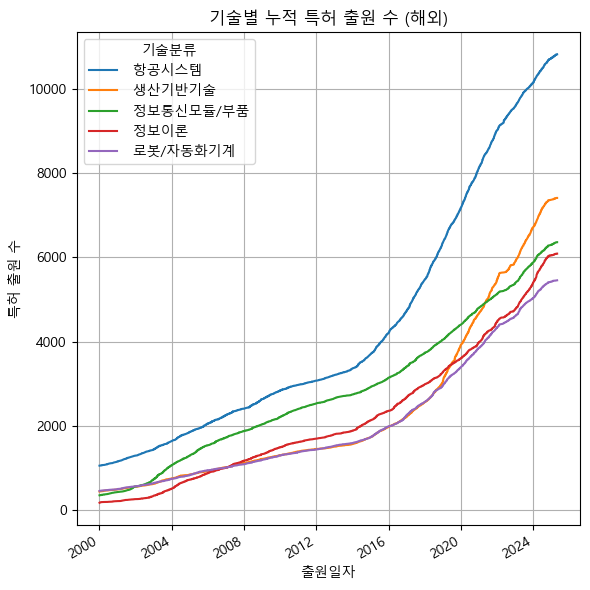

In [191]:
df_u = pd.read_csv("data/WIPO 전체.csv")
# 날짜 처리
df_u['출원일자'] = pd.to_datetime(df_u['출원일자'])

# 월별, 분류별 집계 후 누적합
cumulative = (
    df_u.groupby(['출원일자', '기술분류'], observed=True)
      .size()
      .unstack(fill_value=0)
      .sort_index()
      .cumsum()
)

# 사용자 지정 분류
# selected_categories = [' 항공시스템', ' 생산기반기술', ' 정보통신모듈/부품', ' 정보이론', ' 로봇/자동화기계']
selected_categories = df_u['기술분류'].value_counts().head(5).index
selected_cumulative = cumulative[selected_categories]

# 출원일자 컬럼을 Period 형식으로 변환 후 필터링
filtered_cumulative = selected_cumulative[selected_cumulative.index.to_period('M') >= pd.Period('2000-01-01', freq='M')]

# 그래프 그리기
filtered_cumulative.plot(figsize=(6, 6), title='기술별 누적 특허 출원 수 (해외)')
plt.xlabel('출원일자')
plt.ylabel('특허 출원 수')
plt.grid(True)
plt.tight_layout()
plt.legend(title='기술분류')
# plt.savefig('graph/선그래프_기술별 누적 특허 출원 수 (해외).png')
plt.show()

- 선 그래프 : 출원 월에 따른 특허 출원 수

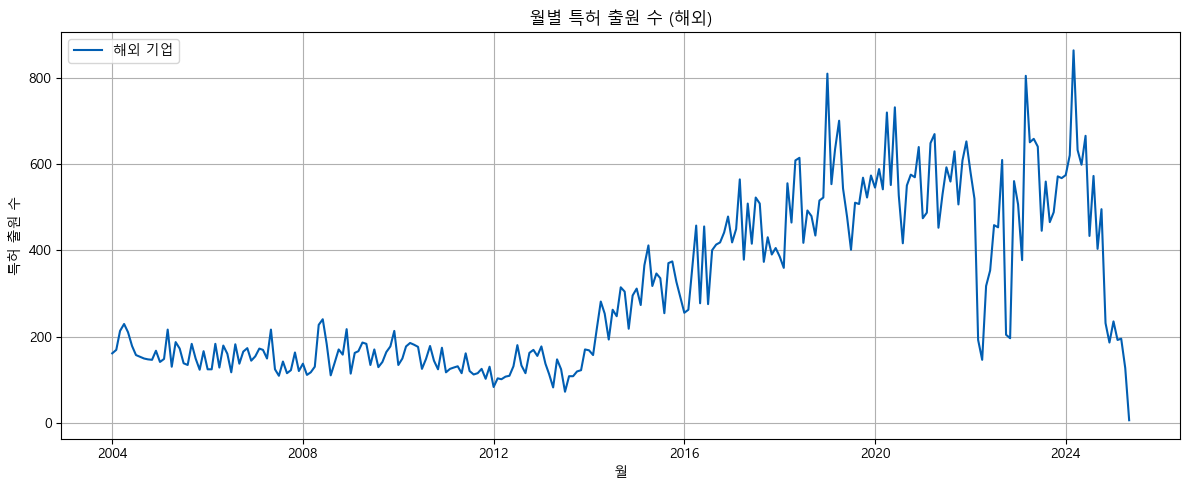

In [190]:
df_u = pd.read_csv("data/WIPO 전체.csv")
# 날짜를 월 단위로 변환 후 그룹화
def get_monthly_counts(df):
    df['출원일자'] = pd.to_datetime(df['출원일자'])
    df = df[df['출원일자'] >= '2004-01-01']
    return df.groupby(df['출원일자'].dt.to_period('M')).size().sort_index()

# 월별 데이터 추출
foreign_counts = get_monthly_counts(df_u)

# 인덱스를 datetime으로 변환 (그래프용)
foreign_counts.index = foreign_counts.index.to_timestamp()

# 색상 팔레트 설정
palette = ['#ff0101','#015eb2']

# 그래프 그리기
plt.figure(figsize=(12, 5))
plt.plot(foreign_counts, label='해외 기업', color=palette[1])
plt.title('월별 특허 출원 수 (해외)')
plt.xlabel('월')
plt.ylabel('특허 출원 수')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig('graph/선그래프_월별 특허 출원 수 (해외).png')
plt.show()